In [1]:
%matplotlib inline

from absorbed_dose_lib import *

In [2]:
# Defined materials:
paraffin = Material(name="Paraffin_Wax", density=0.9, stopping_power="file", file="./Data/paraffin_proton_stopping_data.csv")
water = Material(name="Water", density=0.997, stopping_power="file", file="./Data/water_proton_stopping_data.csv")

In [3]:
#Irradiation Dose
irradiation_dose = 5 #Gy
irradiated_elements_names = ["Cell Layer"]

#Beam Configuration:
beam_energy = 1.5 #MeV
beam_current = 1.0e-3 #nA
beam_diameter = 6.0 #mm

# Elements in the experiment:
experiment_name = "Paraffin and Cells"
names = []
materials = []
lengths = []
colors = []

##First element
names.append("Paraffin Layer")
#Material
materials.append(paraffin)
#Length
lengths.append(20.0*micrometer)
#Plot color
colors.append('y')

##Second element
names.append("Cell Layer")
#Material
materials.append(paraffin)
#Length
lengths.append(10.0*micrometer)
#Plot color
colors.append('m')

##Add as many elements as needed

#Other options
plot_let_data = False
explore_current_interval = False
explore_energy_interval = False
save_results = False

#Other input
integration_points = 10000
outputfile = "./results.txt"
current_interval = np.logspace(-3, 1, 20)
energy_interval = np.linspace(1.0, 10.0, 20)

Experiment Configuration:
Irradiation Dose: 5 Gy
Beam Energy: 1.5 MeV
Beam Current: 1.0 pA
Beam Diameter: 6.0 mm
Paraffin Layer 20.0 micrometers
Cell Layer 10.0 micrometers
Total Length:  30.0 micrometers
dx =  3e-07
Paraffin Layer 6666 points.
Cell Layer 3333 points.

---------------------------------------
Paraffin Layer recibed a dose of 0.0015707021169687778 Gy per second
Cell Layer recibed a dose of 0.000993580632605618 Gy per second

Irradiation time required for a  5 Gy dose absorbed on Cell Layer :
5032.30420956147 s
1 h 23 min 52 s 304 ms
---------------------------------------


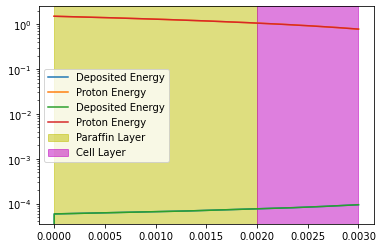

In [4]:
# Plot LET data
if plot_let_data:
    plt.loglog(water.energies, water.stopping_power(water.energies), label="Water LET")
    plt.loglog(paraffin.energies, paraffin.stopping_power(paraffin.energies), "r:", label="Paraffin LET")
    plt.legend()
    plt.show()

    my_energies = np.logspace(-1.0, 1.0, 100 )
    plt.loglog(my_energies, water.stopping_power(my_energies), label="Water LET")
    plt.loglog(my_energies, paraffin.stopping_power(my_energies), "r:", label="Paraffin LET")
    plt.legend()
    plt.show()
    
# My Experiment
elements = []
for i in range(len(names)):
    elements.append(GeometricalElement(name=names[i], length=lengths[i], material=materials[i], color=colors[i]))
my_beam = Beam(energy=beam_energy, intensity=beam_current, diameter=beam_diameter)
my_experiment = Experiment(name=experiment_name, beam=my_beam, elements=elements,
                           irradiation_dose=irradiation_dose, irradiated_elements_names=irradiated_elements_names)
my_experiment.compute(integration_points)
my_experiment.show_results()